In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file for importing dataset of used Audi cars
df=pd.read_csv("audi.csv")

#display the dataset ; here, only top 5 observations are displayed
display(df.head(6))

#look into the dataset to find out missing/incorrect values,observation and column number, variable types, etc  
# display(df.info())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4


In [3]:
##a function for counting cars for individual category
def counting(data,column):

    #count of each feature ; results in a series with feature as index
    feature=df[column].value_counts()

    #reassigning the series as a dataframe
    feature=pd.DataFrame(feature)

    #resetting index
    feature=feature.reset_index()

    #renaming the index using dictionary
    feature=feature.rename(columns={'index':column,column:'no. of cars'})

    #percentage of cars    
    feature['% of cars'] = ((feature['no. of cars']/feature['no. of cars'].sum())*100)
    #rounding percentage to two place of decimal
    feature['% of cars'] = np.round(feature['no. of cars'], 2)

    #return as an output of the function
    return feature

In [4]:
##function run for each feature
model=counting(df,'model')
year=counting(df, 'year')
fuelType=counting(df, 'fuelType')
transmission=counting(df, 'transmission')

##number of unique value of each feature 
# print(len(df['model'].unique()))
# print(len(year))
# print(len(fuelType))
# print(len(df['transmission'].unique()))

In [5]:
#function for plotting the graph/barplot
def barplot (data,axis_x,color,rotation):
    
    #a barplot using seaborn
    #sequence of parameters>> seaborn.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7fecadf1cee0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)¶
    #alpha=0 to 1 for changing transparency)
    sns.barplot(x=axis_x,y='% of cars',data=data,color=color,alpha=0.8)
    
    #title for each barplot
    plt.title("\ntotal no. of cars for each "+ axis_x)
    
    #y label of the barplot
    plt.ylabel("\n% of cars")
    
    #x label of the barplot
    plt.xlabel(axis_x)
    
    #rotation for the x label markings/xticks
    plt.xticks(rotation=rotation)
    
    # setting range for y label markings/yticks
    #plt.yticks(yticks)
    #add yticks as input parameter in barplot function


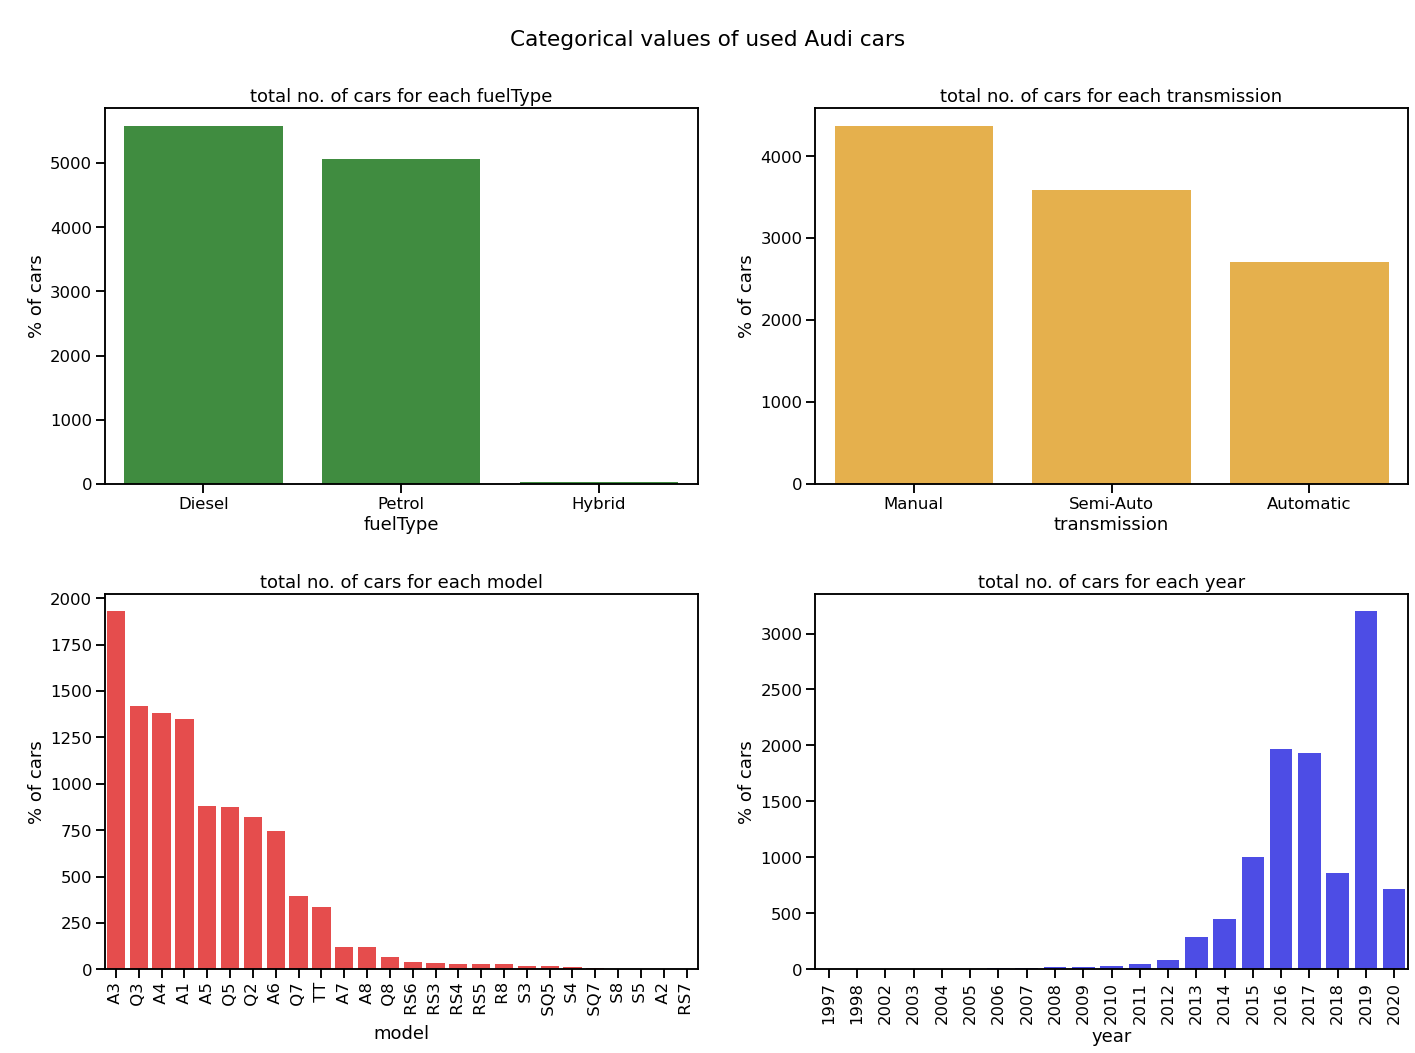

In [6]:
#context parameters used to change size of the labels, lines, and other elements of the plot
#options are-paper(.8), notebook(1.1), talk(1.3), poster(1.6)
sns.set_context('talk')

#customize dimension of the graph
plt.figure(figsize=(20,15))

#title of the whole set of barplots 
plt.suptitle("\nCategorical values of used Audi cars")

#subplotting- displaying two or more plots together in rows and columns
#command pattern>> plt.subplot(no of rows,no of column, position of the plot-(1,2,3,...))

#row 1, column 1 
plt.subplot(2,2,3)
#calling function barplot, input for: data -model, axis_x -'model',color -r(red), rotation for xlabel -90 degrees
barplot(model,'model','r',90)
# barplot(model,'model','r',90)

#row 1, column 2 
plt.subplot(2,2,4)
#calling function barplot, input for: data -year, axis_x -'year',color -b(blue), rotation for xlabel -90 degrees
barplot(year,'year','b',90)

#row 2, column 1 
plt.subplot(2,2,1)
#calling function barplot, input for: data -fuelType, axis_x -'fuelType',color -g(green), rotation for xlabel -0(no rotation)
barplot(fuelType,'fuelType','g',0)

#row 2, column 2
plt.subplot(2,2,2)
#calling function barplot, input for: data -transmission, axis_x -'transmission',color -orange, rotation for xlabel -0(no rotation)
barplot(transmission,'transmission','orange',0)

#to avoid overlapping of title and label of multiple graphs
plt.tight_layout()
#remove extra statements around the graph
plt.show()